In [ ]:
from google.colab import files
uploaded = files.upload()

In [15]:
import pandas as pd
# Load CSVs
amzn_prices = pd.read_csv("AMZN_stock_prices.csv")
tsla_prices = pd.read_csv("TSLA_stock_prices.csv")
msft_prices = pd.read_csv("MSFT_stock_prices.csv")
aapl_prices = pd.read_csv("AAPL_stock_prices.csv")
stock_news = pd.read_csv("stock_news.csv")


In [ ]:
def process_stock_data(df):
  df['date']= pd.to_datetime(df['date'])
  df= df.sort_values('date').reset_index(drop=True)
  df['movement']= df['close']-df['open']
  return df

amzn_cleaned = process_stock_data(amzn_prices)
tsla_cleaned = process_stock_data(tsla_prices)
msft_cleaned =process_stock_data(msft_prices)
aapl_cleaned= process_stock_data(aapl_prices)
amzn_cleaned.tail()

,date,open,close,movement
349,2024-05-23,183.660004,181.050003,-2.610001
350,2024-05-24,181.649994,180.750000,-0.899994
351,2024-05-28,179.929993,182.149994,2.220001
352,2024-05-29,181.699997,182.020004,0.320007
353,2024-05-30,181.309998,179.320007,-1.989990


In [23]:
# Stock News formatting
stock_news['label']= stock_news['label'].str.lower()
stock_news['headline']= stock_news['headline'].str.lower().str.replace('[^a-zA-Z0-9\s\.]', '',regex= True)
if 'Unnamed: 0' in stock_news.columns:
  stock_news.drop(columns=['Unnamed: 0'], inplace= True)
label_mappping= {'positive':1,'neutral':0, 'negative':-1}
stock_news['label_num']= stock_news['label'].map(label_mappping)
stock_news.head()

,headline,label,label_num
0,markets close mostly lower again rost panw rep...,negative,-1
1,gap plummets on earnings miss cuts fullyear fo...,negative,-1
2,billionaire ken fisher is selling these 10 stocks,negative,-1
3,corning net income drops 13 shares fall,negative,-1
4,internet explorer shutdown to cause japan prob...,negative,-1


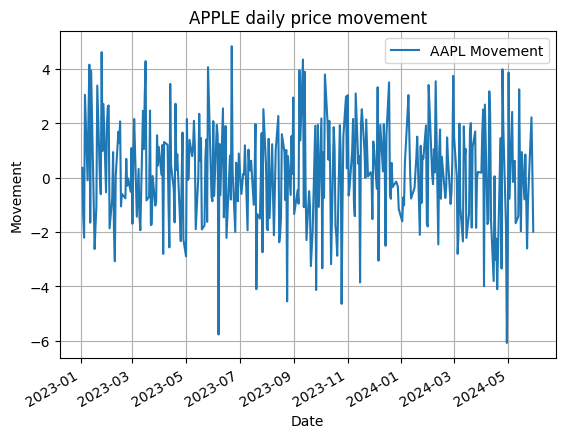

In [18]:
import matplotlib.pyplot as plt
plt.plot()
plt.plot(aapl_cleaned['date'],amzn_cleaned['movement'], label='AAPL Movement')
plt.title('APPLE daily price movement')
plt.xlabel('Date')
plt.gcf().autofmt_xdate()
plt.ylabel('Movement')
plt.grid(True)
plt.legend()
plt.show()



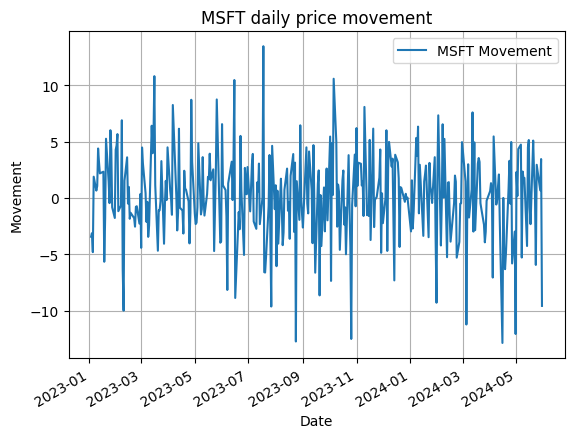

In [22]:
import matplotlib.pyplot as plt
plt.plot()
plt.plot(msft_cleaned['date'],msft_cleaned['movement'], label='MSFT Movement')
plt.title('MSFT daily price movement')
plt.xlabel('Date')
plt.gcf().autofmt_xdate()
plt.ylabel('Movement')
plt.grid(True)
plt.legend()
plt.show()

In [26]:
# MERGING stock news and stock price
import numpy as np

date_range = amzn_cleaned['date'].values
n_headlines= len(stock_news)
n_dates= len(date_range)
per_day= int(np.ceil(n_headlines/n_dates))
news_dates = np.repeat(date_range, per_day)[:n_headlines]
stock_news['date'] = news_dates


In [27]:
# Merge news with stock price data by date
merged_amzn = pd.merge(amzn_cleaned, stock_news, on='date', how='inner')
merged_aapl = pd.merge(aapl_cleaned, stock_news, on='date', how='inner')
merged_tsla = pd.merge(tsla_cleaned, stock_news, on='date', how='inner')
merged_msft = pd.merge(msft_cleaned, stock_news, on='date', how='inner')


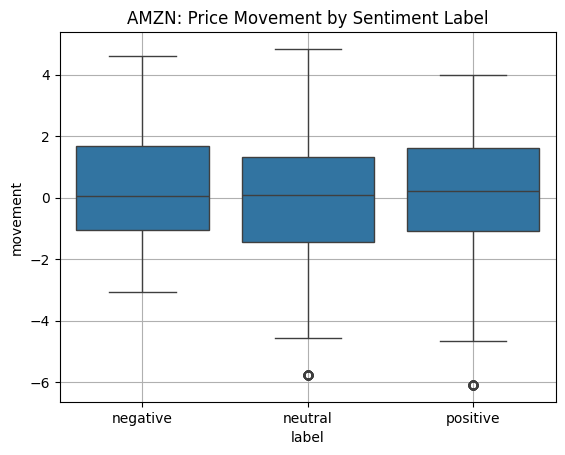

In [28]:
import seaborn as sns

# Example: sentiment vs movement for AMZN
sns.boxplot(data=merged_amzn, x='label', y='movement')
plt.title("AMZN: Price Movement by Sentiment Label")
plt.grid(True)
plt.show()


In [29]:
merged_amzn.to_csv("AMZN_merged.csv", index=False)
merged_aapl.to_csv("AAPL_merged.csv", index=False)
merged_tsla.to_csv("TSLA_merged.csv", index=False)
merged_msft.to_csv("MSFT_merged.csv", index=False)
